In [2]:
import pandas as pd
import numpy as np

TRACKING_COLUMN_NAMES = ['frame', 'track_id', 'type', 'truncated', 'occluded', 'alpha', 'bbox_left', 'bbox_top',
                         'bbox_right', 'bbox_bottom', 'height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']
df = pd.read_csv('/home/liver/data/kitti/Tracking/training/label_02/0000.txt', header=None, sep=' ')
df.columns = TRACKING_COLUMN_NAMES
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/liver/data/kitti/Tracking/training/label_02/0000.txt'

In [ ]:
df.loc[df.type.isin(['Truck', 'Van', 'Tram']), 'type'] = 'Car'
df = df[df.type.isin(['Car', 'Pedestrain', 'Cyclist'])]
df

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
12,2,0,Car,0,0,-1.800343,293.093560,150.470149,449.259225,277.104290,2.000000,1.823255,4.433886,-4.749625,1.675025,13.751675,-2.127642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,153,9,Car,0,0,-1.933141,756.900536,167.630718,1086.145857,374.000000,1.596000,1.698089,3.562650,2.693079,1.583962,7.270567,-1.592798
1084,153,10,Car,0,2,-1.818856,680.294919,177.511028,842.313244,284.070033,1.524000,1.728591,3.894227,2.353367,1.622590,12.436503,-1.637280
1085,153,11,Car,0,2,1.864481,245.920800,194.456182,394.817829,286.444967,1.444000,1.595116,3.791789,-5.458963,1.908188,13.979427,1.497916
1087,153,13,Car,0,0,1.773993,344.361560,188.772369,430.531955,248.482384,1.422414,1.512803,3.707634,-6.033258,1.888008,19.788795,1.481180


In [ ]:
box = np.array(df.loc[2, ['bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom']])
box

array([296.744956, 161.752147, 455.226042, 292.372804], dtype=object)

In [ ]:
DETECTION_COLOR_DICT = {'Car':(255, 255, 0), 'Pedestrian':(0, 226, 255), 'Cyclist':(141, 40, 255)}

In [ ]:
my_list = [i for i in range(4)]
my_list

[0, 1, 2, 3]

In [ ]:
import cv2

frame = 120
image = cv2.imread('/home/liver/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/image_02/data/%010d.png'%frame)
boxes = np.array(df[df['frame']==frame][['bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom']])
types = np.array(df[df['frame']==frame]['type'])

for box, data_type in zip(boxes, types):
    top_left = int(box[0]), int(box[1])
    bottom_right = int(box[2]), int(box[3])
    cv2.rectangle(image, top_left, bottom_right, DETECTION_COLOR_DICT[data_type], 2)

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import numpy as np
import pandas as pd
IMU_COLUMN_NAMES = ['lat', 'lon', 'alt', 'roll', 'pitch', 'yaw', 'vn', 've', 'vf', 'vl', 'vu', 'ax', 'ay', 'az', 'af',
                    'al', 'au', 'wx', 'wy', 'wz', 'wf', 'wl', 'wu', 'posacc', 'velacc', 'navstat', 'numsats', 'posmode',
                    'velmode', 'orimode']
def read_imu(path):
    df = pd.read_csv(path, header=None, sep=' ')
    df.columns = IMU_COLUMN_NAMES
    return df
def compute_great_circle_distance(lat1, lon1, lat2, lon2):
    """
    Compute the great circle distance from two gps data
    Input   : latitudes and longitudes in degree
    Output  : distance in meter
    """
    delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+ \
                        np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos(lon1*np.pi/180-lon2*np.pi/180))
    # incase result is greater than 1, arccose would break
    if np.abs(delta_sigma) > 1:
        return 0.0
    return 6371000.0 * np.arccos(delta_sigma)

In [4]:
prev_imu_data = None
gps_distance = []
imu_distance = []
for frame in range(153):
    imu_data = read_imu('/home/liver/Self-driving-Project/catkin_ws/src/kitti_tutorial/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    if prev_imu_data is not None:
        gps_distance += [compute_great_circle_distance(imu_data.lat, imu_data.lon, prev_imu_data.lat, prev_imu_data.lon)]
        imu_distance += [0.1 * np.linalg.norm(imu_data[['vf', 'vl']])]
    prev_imu_data = imu_data

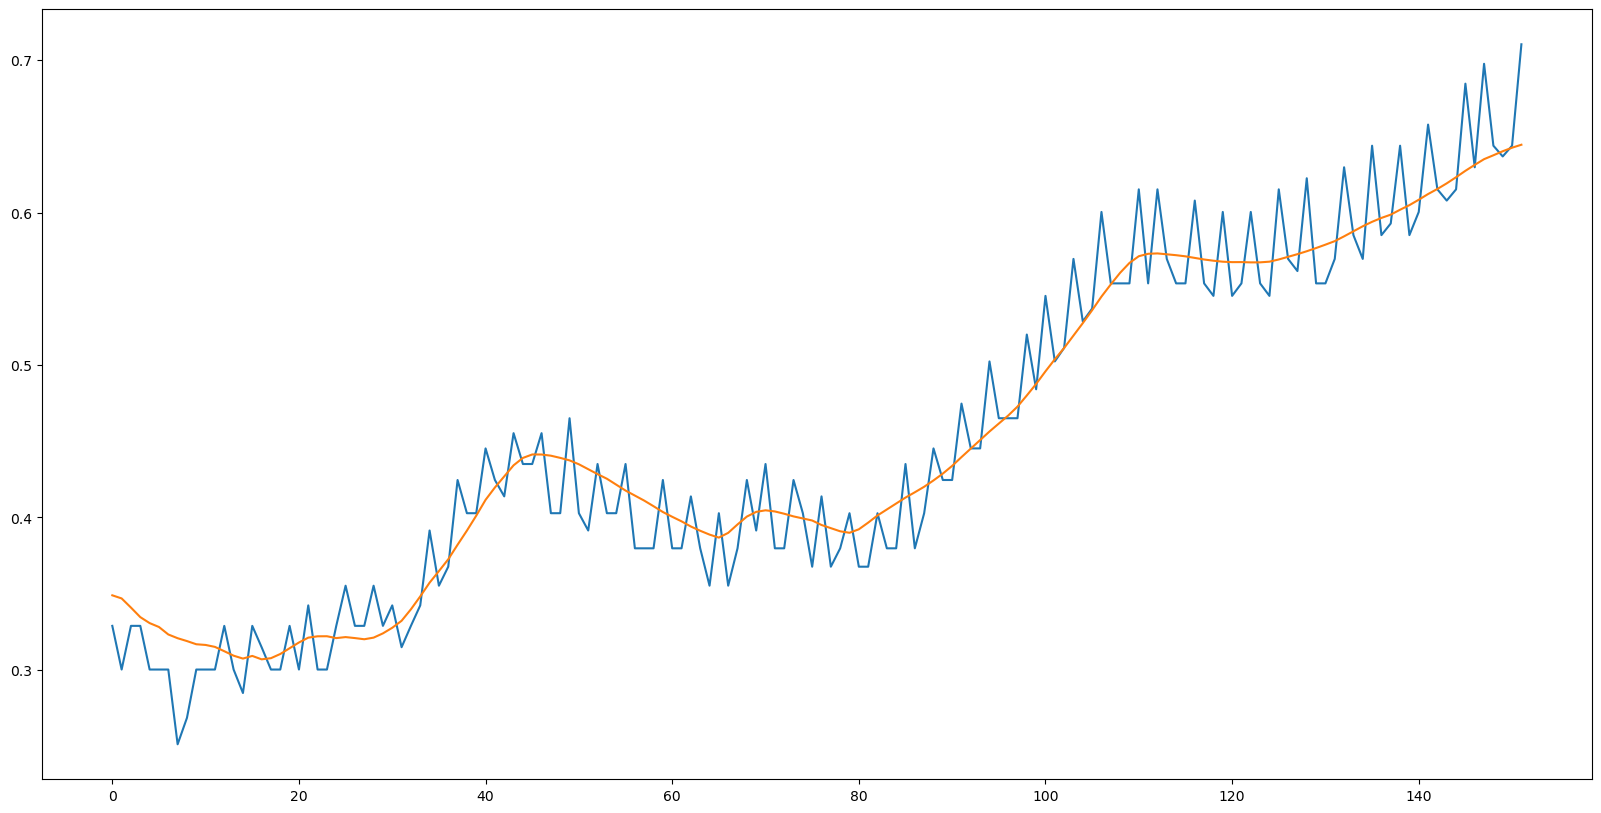

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(gps_distance, label = 'gps_distance')
plt.plot(imu_distance, label = 'imu_distance')
plt.show()
# in the long run, GPS is more accurate, while in short run imu would be better

In [6]:
read_imu('/home/liver/Self-driving-Project/catkin_ws/src/kitti_tutorial/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/0000000000.txt')

,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wf,wl,wu,posacc,velacc,navstat,numsats,posmode,velmode,orimode
0,49.011213,8.422885,112.834923,0.022447,0.00001,-1.22191,-3.325632,1.138431,3.514768,0.037625,...,-0.017499,0.021393,0.14563,0.492294,0.068884,4,10,4,4,0


In [ ]:
read_imu('/home/liver/Self-driving-Project/catkin_ws/src/kitti_tutorial/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/0000000001.txt')

,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wf,wl,wu,posacc,velacc,navstat,numsats,posmode,velmode,orimode
0,49.01121,8.422887,112.846901,0.022857,0.004342,-1.206077,-3.288107,1.166745,3.488639,0.054704,...,-0.004166,0.044282,0.139954,0.492294,0.068884,4,10,4,4,0


In [9]:
prev_imu_data = None
locations = []

for frame in range(153):
    imu_data = read_imu('/home/liver/Self-driving-Project/catkin_ws/src/kitti_tutorial/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    
    if prev_imu_data is not None:
        displacement = 0.1 * np.linalg.norm(imu_data[['vf', 'vl']])
        yaw_change = float(imu_data.yaw - prev_imu_data.yaw)
        for i in range(len(locations)):
            x0, y0 = locations[i]
            x1 = x0 * np.cos(yaw_change) + y0 * np.sin(yaw_change) - displacement
            y1 = -x0 * np.sin(yaw_change) + y0 * np.cos(yaw_change)
            locations[i] = np.array([x1, y1])    
    locations += [np.array([0, 0])]
    prev_imu_data = imu_data

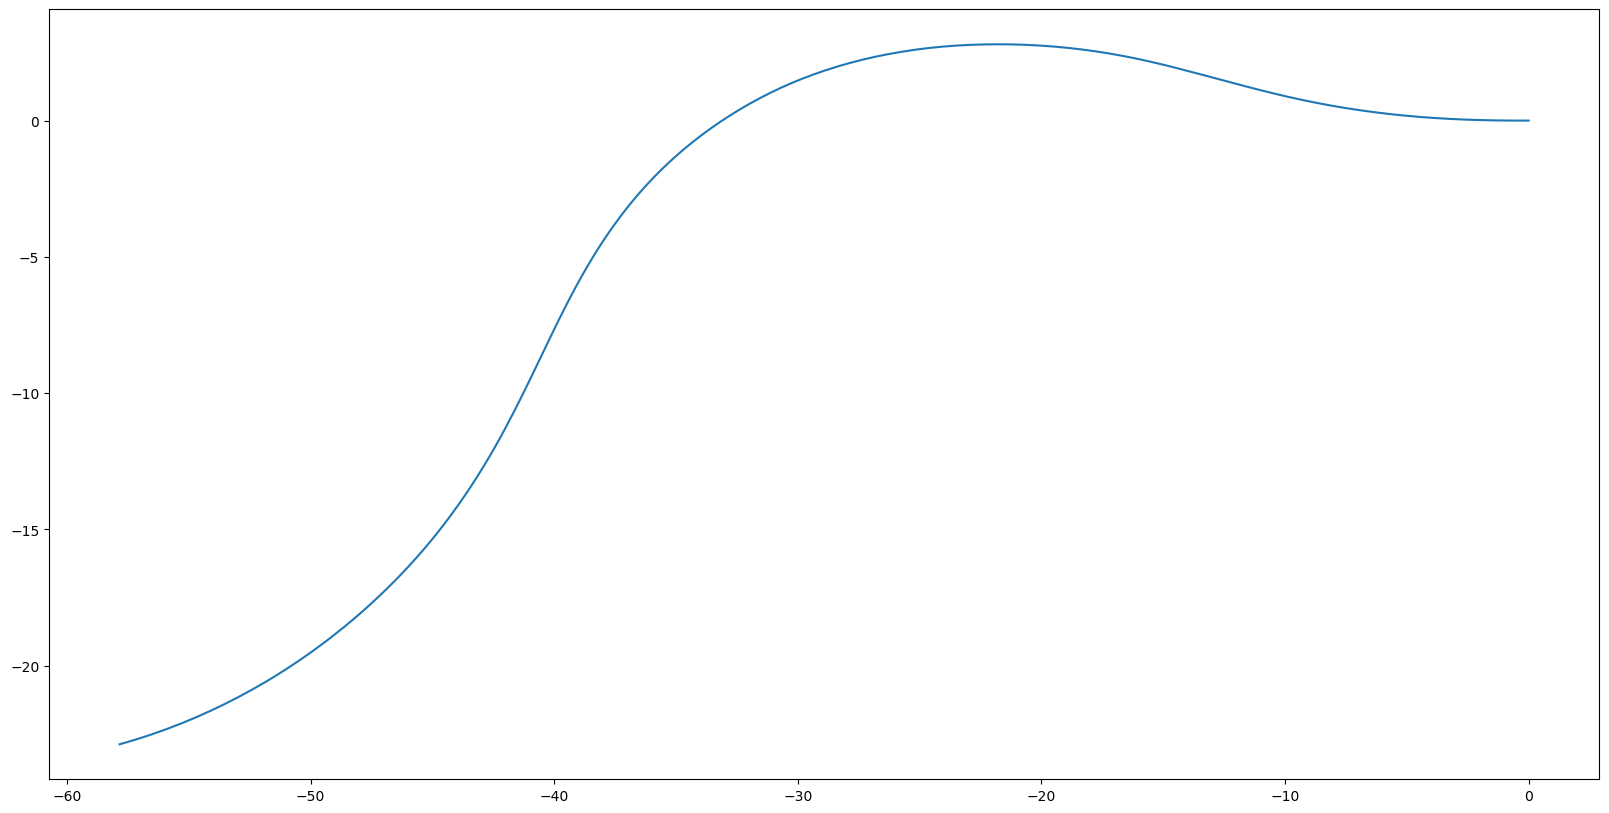

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(locations)[:, 0], np.array(locations)[:, 1])